# Investigating PCA for clustering

Generate random data with relationships. Run PCA.
Removing components should reduce noise? Makes data more clustered.

In [3]:
import numpy as np
import pandas as pd
import sklearn.decomposition
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

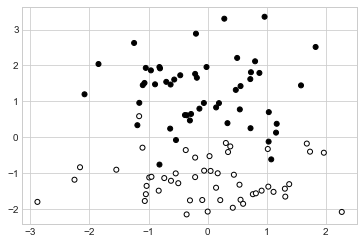

In [7]:

import sklearn.datasets
X1, Y1 = sklearn.datasets.make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [12]:
rand_gen.uniform(size=(n_rows, 1)).shape

(2000, 1)

/var/folders/yq/ddhnc0l57fv0ws1v2qjb0l900000gn/T/ipykernel_56825/2471828960.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


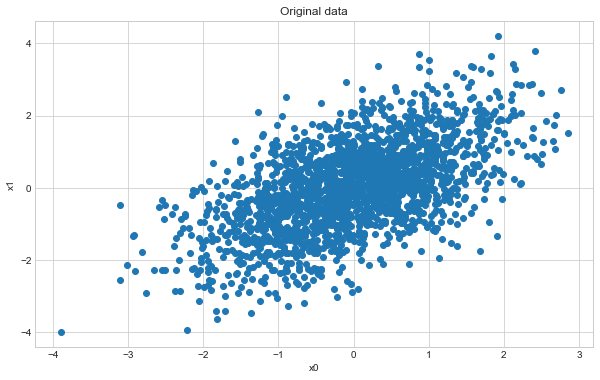

In [17]:
rand_gen = np.random.default_rng(seed=0)

n_rows = 2000
n_cols = 2
x = rand_gen.normal(size=(n_rows, n_cols))
x[:, 1] = x[:, 0]*0.7 + rand_gen.normal(size=(n_rows))

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x[:,0], x[:,1])
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_title("Original data")
fig.show()

In [19]:
pca = sklearn.decomposition.PCA()
y = pca.fit_transform(x)

/var/folders/yq/ddhnc0l57fv0ws1v2qjb0l900000gn/T/ipykernel_56825/696833476.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


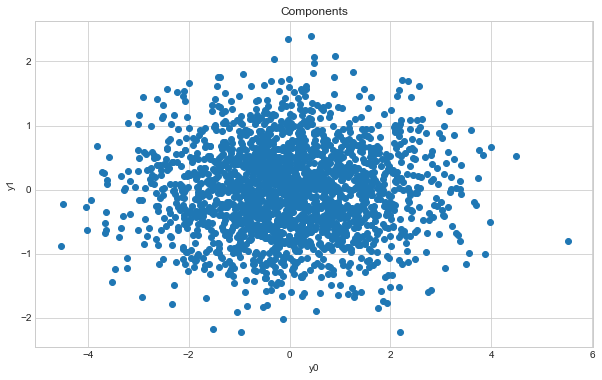

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y[:,0], y[:,1])
ax.set_xlabel("y0")
ax.set_ylabel("y1")
ax.set_title("Components")
fig.show()

In [25]:
print(np.std(x, axis=0))
print(np.std(y, axis=0))

[1.00213352 1.21366986]
[1.40737011 0.70468112]


In [26]:
pca.components_

array([[-0.58488181, -0.81111853],
       [ 0.81111853, -0.58488181]])

In [27]:
pca = sklearn.decomposition.PCA(n_components=1)
y_1 = pca.fit_transform(x)
pca.components_

array([[-0.58488181, -0.81111853]])

/var/folders/yq/ddhnc0l57fv0ws1v2qjb0l900000gn/T/ipykernel_56825/3376678495.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


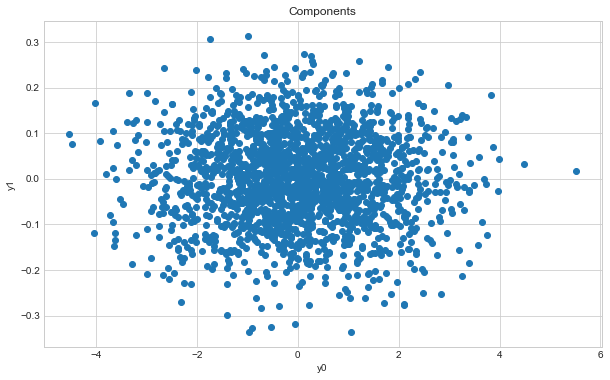

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_1[:,0], rand_gen.normal(scale=0.1, size=(y_1.shape)))
ax.set_xlabel("y0")
ax.set_ylabel("y1")
ax.set_title("Components")
fig.show()

/var/folders/yq/ddhnc0l57fv0ws1v2qjb0l900000gn/T/ipykernel_56825/1601077440.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


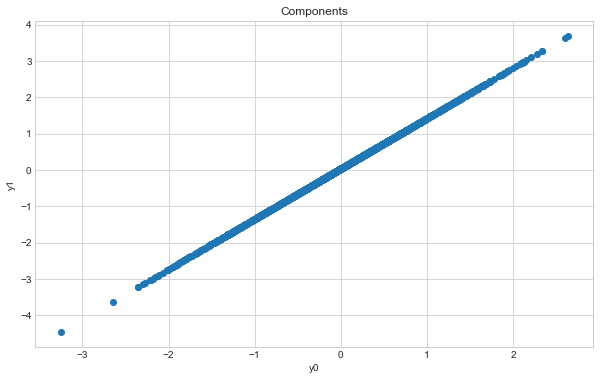

In [32]:
x_1 = pca.inverse_transform(y_1)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x_1[:,0], x_1[:,1])
ax.set_xlabel("y0")
ax.set_ylabel("y1")
ax.set_title("Components")
fig.show()